In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/CV_ENG_8160/Module03'

/content/drive/MyDrive/CV_ENG_8160/Module03


In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from skimage import io, transform
from tqdm import tqdm

In [4]:
import os
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [32]:
class traffic_sign(Dataset):
    def __init__(self, root_dir ):

        # initialize dataset variables here
        # self.root = root_dir
        self.root = Path(root_dir)

        self.df = pd.DataFrame(columns = ['image_names','class_label'])

        for fldr in self.root.iterdir():
          img_names = []
          if fldr.is_dir():
            img_names = img_names + list(fldr.glob('*.ppm'))

          img_names = [i for i in img_names]
          df_cur = pd.DataFrame(img_names,columns = ['image_names'])
          df_cur['class_label'] = fldr.name
          self.df = pd.concat([self.df, df_cur],axis=0)

        self.df = self.df.sample(frac=1)
        self.df = self.df.head(3000)

        dummies = pd.get_dummies(data = self.df,columns=['class_label'])
        self.df = self.df.merge(dummies, on='image_names')

        self.image_names = list(self.df['image_names'].values)
        self.class_label = list(self.df.iloc[:,2:].values)


    def __len__(self):
        # returns the length of the dataset
        return len(self.image_names)

    def __getitem__(self, idx):

        # preprocess and transformations
        # indexes the dataset such that dataset[i] can retrieve the ith sample.
        image = self.image_names[idx]
        # scale = Rescale(256)
        image_data = io.imread(image)
        # image_np = Image.fromarray(image_data)

        # label = float(self.class_label[idx].strip('0'))
        label = torch.tensor(self.class_label[idx], dtype=torch.float32)


        sample = {'image': image_data, 'label': label}
        scale = Rescale((64,64))
        sample = scale(sample)

        return sample

In [33]:
## transform data
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, labels = sample['image'], sample['label']

        h, w = image.shape[:2]

        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        return {'image': img, 'label': labels}

In [34]:
class ToTensor(object):
    def __call__(self, sample):
        input, output = sample['image'], sample['label']

        return {'image': torch.tensor(np.array(input),dtype=torch.float32).reshape(16,-1),
                'label': torch.tensor(output,dtype=torch.float32).reshape(16,-1)}

In [35]:
traffic_sign_dataset = traffic_sign('/content/drive/MyDrive/CV_ENG_8160/Module03/traffic_signs_class')

In [39]:
df_ = traffic_sign_dataset.df.head(100)

In [40]:
df_.head()

,image_names,class_label,class_label_00013,class_label_00014,class_label_00029,class_label_00031,class_label_00033,class_label_00034,class_label_00040
0,/content/drive/MyDrive/CV_ENG_8160/Module03/tr...,00040,0,0,0,0,0,0,1
1,/content/drive/MyDrive/CV_ENG_8160/Module03/tr...,00034,0,0,0,0,0,1,0
2,/content/drive/MyDrive/CV_ENG_8160/Module03/tr...,00013,1,0,0,0,0,0,0
3,/content/drive/MyDrive/CV_ENG_8160/Module03/tr...,00031,0,0,0,1,0,0,0
4,/content/drive/MyDrive/CV_ENG_8160/Module03/tr...,00013,1,0,0,0,0,0,0


In [41]:
for i, sample in enumerate(traffic_sign_dataset):
  print(i, sample['image'].shape, sample['label'])
  if i == 10:
    break

0 (64, 64, 3) tensor([0., 0., 0., 0., 0., 0., 1.])
1 (64, 64, 3) tensor([0., 0., 0., 0., 0., 1., 0.])
2 (64, 64, 3) tensor([1., 0., 0., 0., 0., 0., 0.])
3 (64, 64, 3) tensor([0., 0., 0., 1., 0., 0., 0.])
4 (64, 64, 3) tensor([1., 0., 0., 0., 0., 0., 0.])
5 (64, 64, 3) tensor([0., 0., 0., 0., 1., 0., 0.])
6 (64, 64, 3) tensor([0., 0., 0., 0., 0., 0., 1.])
7 (64, 64, 3) tensor([0., 1., 0., 0., 0., 0., 0.])
8 (64, 64, 3) tensor([1., 0., 0., 0., 0., 0., 0.])
9 (64, 64, 3) tensor([0., 0., 0., 0., 1., 0., 0.])
10 (64, 64, 3) tensor([0., 0., 0., 0., 0., 1., 0.])


In [42]:
traffic_sign_dataset[10]['image'].reshape(-1,1).shape

(12288, 1)

In [43]:
traffic_sign_dataset[20]['label']

tensor([0., 0., 0., 0., 0., 0., 1.])

In [44]:
ts = ToTensor()
# sample = ts(traffic_sign_dataset)

In [45]:
print (sample['image'].shape)

(64, 64, 3)


In [46]:
## how will we add softmax to this
model = nn.Sequential(
        nn.Linear(12288, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 7)
        )

In [47]:
bs = 16

dataloader = DataLoader(traffic_sign_dataset, batch_size=bs, shuffle=True, num_workers=4,drop_last=True)


In [48]:
for i, sample in enumerate(dataloader):
  # print (sample['image'].size())
  sample = ts(sample)
  print (sample['image'].size(), sample['label'].size())
  if i == 2:
    break

torch.Size([16, 12288]) torch.Size([16, 7])
torch.Size([16, 12288]) torch.Size([16, 7])
torch.Size([16, 12288]) torch.Size([16, 7])


In [49]:
criterion = nn.CrossEntropyLoss()
# criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [50]:
mean_loss = []
losses = []
test_losses = []
mean_test_loss = []
ts = ToTensor()
n_epochs = 10
for it in tqdm(range(n_epochs)):
  # zero the parameter gradients
  for i_batch, sample_batched in enumerate(dataloader):
    optimizer.zero_grad()
    sample_batched = ts(sample_batched)
    outputs = model(sample_batched['image'])
    loss = criterion(outputs, sample_batched['label'])
    losses.append(loss.item())
    # print (loss)

    loss.backward()
    optimizer.step()
  mean_loss.append(np.mean(losses))
  print(f'Epoch {it+1}/{n_epochs}, Training Loss: {np.mean(losses):.4f}')


 10%|█         | 1/10 [02:12<19:49, 132.21s/it]

Epoch 1/10, Training Loss: 0.9988


 20%|██        | 2/10 [02:28<08:31, 63.92s/it] 

Epoch 2/10, Training Loss: 0.6780


 30%|███       | 3/10 [02:44<04:55, 42.26s/it]

Epoch 3/10, Training Loss: 0.5234


 40%|████      | 4/10 [03:01<03:14, 32.35s/it]

Epoch 4/10, Training Loss: 0.4352


 50%|█████     | 5/10 [03:18<02:12, 26.50s/it]

Epoch 5/10, Training Loss: 0.3853


 60%|██████    | 6/10 [03:34<01:32, 23.06s/it]

Epoch 6/10, Training Loss: 0.3362


 70%|███████   | 7/10 [03:51<01:02, 21.00s/it]

Epoch 7/10, Training Loss: 0.3116


 80%|████████  | 8/10 [04:07<00:39, 19.53s/it]

Epoch 8/10, Training Loss: 0.2801


 90%|█████████ | 9/10 [04:24<00:18, 18.63s/it]

Epoch 9/10, Training Loss: 0.2665


100%|██████████| 10/10 [04:41<00:00, 28.10s/it]

Epoch 10/10, Training Loss: 0.2444


In [51]:
torch.save(model.state_dict(), 'traffic_model.pt')

In [52]:
## load saved model
model_arch = nn.Sequential(
        nn.Linear(12288, 256),
        nn.ReLU(),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 7)
        )
model_arch.load_state_dict(torch.load('traffic_model.pt'))
model_arch.eval()

Sequential(
  (0): Linear(in_features=12288, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=7, bias=True)
)

In [ ]:
ts = ToTensor()
for i_batch, sample_batched in enumerate(dataloader):
      sample_batched = ts(sample_batched)
      outputs = model(sample_batched['image'])
      # outputs
      print (outputs.reshape(-1).tolist())
      print (sample_batched['label'].reshape(-1).tolist())
      print ('######')

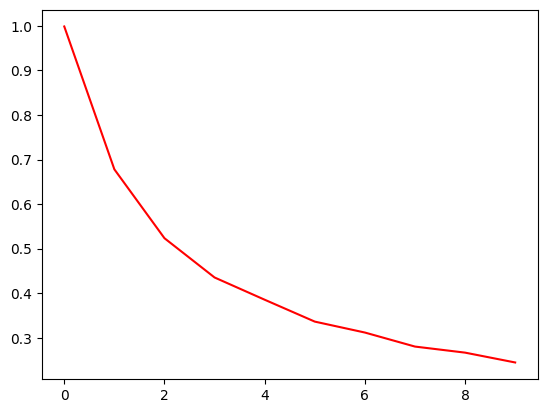

In [54]:
plt.plot(mean_loss,'r')

In [55]:
from utils.model import *
from dataset.data import *

In [56]:
## save a model
torch.save(model.state_dict(), 'model.pt')

In [57]:
class ToTensor(object):
    def __call__(self, sample):
        input, output = sample['image'], sample['label']

        return {'image': torch.tensor(np.array(input),dtype=torch.float32).reshape(16,-1),
                'label': torch.tensor(output,dtype=torch.float32).reshape(16,-1)}

In [58]:
ts = ToTensor()
sum_acc = 0
sum_total = 0

for i_batch, sample_batched in enumerate(dataloader):
      sample_batched = ts(sample_batched)
      outputs = model(sample_batched['image'])
      # outputs
      pred = np.argmax(outputs.detach().numpy(), axis=1)
      target = np.argmax(sample_batched['label'].numpy(), axis=1)
      sum_acc += np.sum(pred == target)
      sum_total += len(pred)

accuracy = (sum_acc / sum_total)*100
print ("accuracy:", accuracy)

accuracy: 99.53208556149733


In [ ]:
# ## load saved model
# model_arch = my_first_nn(input_d,output_d)
# model_arch.load_state_dict(torch.load('model.pt'))
# model_arch.eval()

In [ ]:
# bs = 5000
# mu = traffic_obj_test.df['occupancy'].mean()
# std = traffic_obj_test.df['occupancy'].mean()
# dataloader = DataLoader(traffic_obj_test, batch_size=bs, shuffle=False, num_workers=4,drop_last=True)
# pred_obj = Predict(model_arch,mu,std)
# pred_output = pred_obj(dataloader)